![example](images/director_shot.jpeg)

# Microsoft Movie Studio Analysis

**Authors:** Ricky Wong
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

IMDb is an online database for information related to films and other video entertainment. We have basic data of the movies  which includes the genre, ratings for movies and also how much each movie made.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
imdb_title_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz', compression='gzip')
imdb_title_ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz', compression='gzip')
bom_movie_gross_df = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz', compression='gzip')


## IMDb Title

Basic movie data like name of movie, year of release, runtime and genre

In [3]:
imdb_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
imdb_title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
imdb_title_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

In [6]:
imdb_title_df['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Biography,Music,Musical           1
Animation,Fantasy,Thriller        1
Animation,Music,Thriller          1
Biography,Family,News             1
Adventure,Fantasy,War             1
Name: genres, Length: 1085, dtype: int64

In [7]:
imdb_title_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


## IMDb Ratings
The average rating and number of votes for each movie.

In [8]:
imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
imdb_title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
imdb_title_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


## BOM Gross
How much money each movie made domestic and overseas

In [11]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
bom_movie_gross_df['studio'].value_counts()

IFC         166
Uni.        147
WB          140
Fox         136
Magn.       136
           ... 
B360          1
TA            1
PalUni        1
SEG           1
Blue Fox      1
Name: studio, Length: 257, dtype: int64

In [14]:
pd.options.display.float_format = "{:.2f}".format
bom_movie_gross_df.describe()

,domestic_gross,year
count,3359.00,3387.00
mean,28745845.07,2013.96
std,66982498.24,2.48
min,100.00,2010.00
25%,120000.00,2012.00
50%,1400000.00,2014.00
75%,27900000.00,2016.00
max,936700000.00,2018.00


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?


### Join IMDB title and ratings together
- Merged title and ratings as ratings only had the movie ID, now we can see the rating and know which movie it is for.
- Inner join will remove movies that do not have a rating. This is fine since we are only looking at popular movies.
- 'tconst' is useful for merging tables but is not necesarry for analysing. We can remove 'original_title' as well and just use 'primary_title'
- Renamed a few column names
- Sorting by average rating does not actually show how popular a movie was as the number of votes were low so sort by number of votes is more indicative of popularity

In [15]:
#we are only interested in movies that have a rating/votes
imdb_title_df[['genre2','genre3']] = ''
imdb_title_df[['genres','genre2','genre3']] = imdb_title_df['genres'].str.split(',', expand=True)
imdb_movie_info = imdb_title_df.join(imdb_title_ratings_df.set_index('tconst'), on='tconst', how='inner')
imdb_movie_info.drop(['tconst','original_title'], axis=1, inplace=True)
imdb_movie_info.rename(columns = {'primary_title': 'title', 'start_year': 'year', 'genres':'genre1'}, inplace=True)
imdb_movie_info = imdb_movie_info.sort_values(by='numvotes', ascending=False)
imdb_movie_info.reset_index(drop=True, inplace=True)
imdb_movie_info.to_csv('data/cleaned_imdb_movie_info.csv', index=False)
imdb_movie_info.head(20)



,title,year,runtime_minutes,genre1,genre2,genre3,averagerating,numvotes
0,Inception,2010,148.00,Action,Adventure,Sci-Fi,8.80,1841066
1,The Dark Knight Rises,2012,164.00,Action,Thriller,None,8.40,1387769
2,Interstellar,2014,169.00,Adventure,Drama,Sci-Fi,8.60,1299334
3,Django Unchained,2012,165.00,Drama,Western,None,8.40,1211405
4,The Avengers,2012,143.00,Action,Adventure,Sci-Fi,8.10,1183655
5,The Wolf of Wall Street,2013,180.00,Biography,Crime,Drama,8.20,1035358
6,Shutter Island,2010,138.00,Mystery,Thriller,None,8.10,1005960
7,Guardians of the Galaxy,2014,121.00,Action,Adventure,Comedy,8.10,948394
8,Deadpool,2016,108.00,Action,Adventure,Comedy,8.00,820847
9,The Hunger Games,2012,142.00,Action,Adventure,Sci-Fi,7.20,795227


In [16]:
top_ten = imdb_movie_info.head(10)
genres = pd.Series(list(imdb_movie_info['genre1'].unique()))
genre_dict = dict.fromkeys(genres,0)

g1 = top_ten[['genre1']].value_counts()
g2 = top_ten[['genre2']].value_counts()
g3 = top_ten[['genre3']].value_counts()

# g = list(top_ten['genre1'])
# g.append(list(top_ten['genre2']))
# g
d1 = pd.DataFrame(imdb_movie_info.head(10), columns=["genre1"]).groupby('genre1').size().to_dict()
d2 = pd.DataFrame(imdb_movie_info.head(10), columns=["genre2"]).groupby('genre2').size().to_dict()
d3 = pd.DataFrame(imdb_movie_info.head(10), columns=["genre3"]).groupby('genre3').size().to_dict()


def addGenre(genre_count, add_dict, genres):
    for key in add_dict:
        for i in range(len(genre_count)):
            if key == genres[i]:
                genre_count[key] += add_dict[key]
    return genre_count

genre_dict = addGenre(genre_dict, d1, genres)
genre_dict = addGenre(genre_dict, d2, genres)
genre_dict = addGenre(genre_dict, d3, genres)
genre_dict


{'Action': 6,
 'Adventure': 6,
 'Drama': 3,
 'Biography': 1,
 'Mystery': 1,
 'Comedy': 2,
 'Crime': 1,
 'Animation': 0,
 'Horror': 0,
 'Family': 0,
 'Romance': 0,
 'Fantasy': 0,
 'Documentary': 0,
 'Sci-Fi': 4,
 'Thriller': 2,
 'Music': 0,
 'Musical': 0,
 'War': 0,
 'Western': 1,
 'History': 0,
 nan: 0,
 'Sport': 0,
 'Adult': 0,
 'Reality-TV': 0,
 'News': 0,
 'Game-Show': 0}

### Movie Gross
- Add 0 for missing gross values
- Unable to convert 'foreign_gross' to float and founds values with commas for over a billion
- to maximise profits we should consider international makret too not just domestic market

In [17]:
bom_movie_gross_df['domestic_gross'].fillna(0, inplace=True)
bom_movie_gross_df['foreign_gross'].fillna(0, inplace=True)

#find values with comma and update them
billion_s = bom_movie_gross_df['foreign_gross'].str.contains(',',na=False)
new_bom_movie_gross_df = bom_movie_gross_df['foreign_gross'].str.replace(',', '')
new_bom_movie_gross_df.fillna(0, inplace=True)
new_bom_movie_gross_df = pd.to_numeric(new_bom_movie_gross_df)
new_bom_movie_gross_df.loc[billion_s]*=1000000
bom_movie_gross_df['foreign_gross'] = new_bom_movie_gross_df

In [18]:
#add domestic and foreign gross
bom_movie_gross_df['total_gross'] = bom_movie_gross_df['domestic_gross'] + bom_movie_gross_df['foreign_gross']
bom_movie_gross_df = bom_movie_gross_df.sort_values(by='total_gross', ascending=False)
bom_movie_gross_df.reset_index(drop=True, inplace=True)
bom_movie_gross_df.to_csv('data/cleaned_bom_movie_gross.csv', index=False)
bom_movie_gross_df.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Star Wars: The Force Awakens,BV,936700000.00,1131600000.00,2015,2068300000.00
1,Avengers: Infinity War,BV,678800000.00,1369500000.00,2018,2048300000.00
2,Jurassic World,Uni.,652300000.00,1019400000.00,2015,1671700000.00
3,Marvel's The Avengers,BV,623400000.00,895500000.00,2012,1518900000.00
4,Furious 7,Uni.,353000000.00,1163000000.00,2015,1516000000.00
5,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
6,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
7,Harry Potter and the Deathly Hallows Part 2,WB,381000000.00,960500000.00,2011,1341500000.00
8,Star Wars: The Last Jedi,BV,620200000.00,712400000.00,2017,1332600000.00
9,Jurassic World: Fallen Kingdom,Uni.,417700000.00,891800000.00,2018,1309500000.00


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

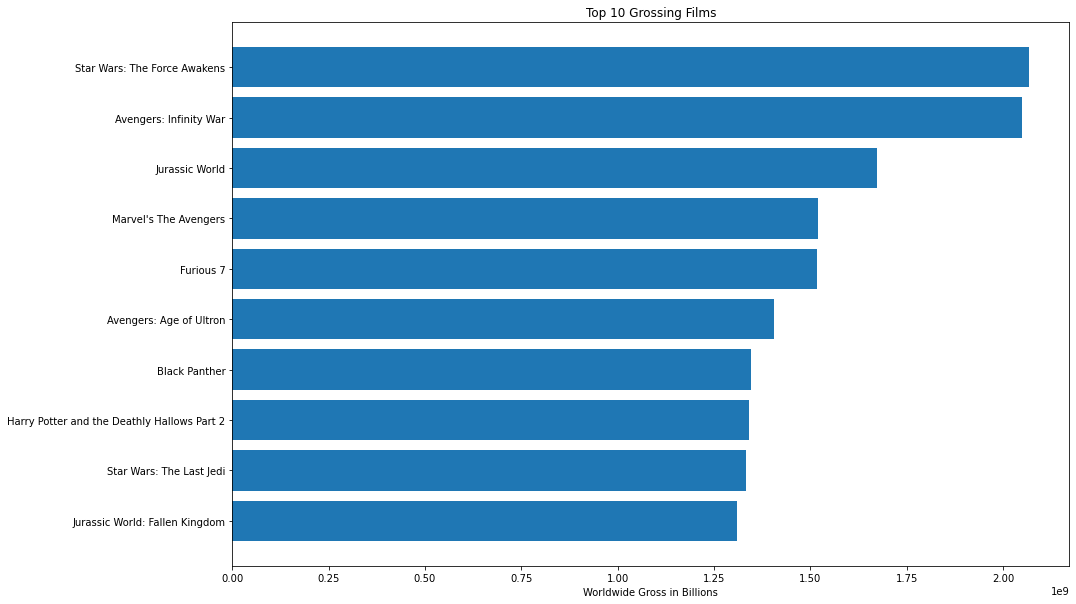

In [19]:
# Here you run your code to model the data
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,10))

top_ten_title = bom_movie_gross_df['title'][:10]
top_ten_gross = bom_movie_gross_df['total_gross'][:10]

ax.barh(top_ten_title, top_ten_gross)
ax.set_title("Top 10 Grossing Films")
ax.set_xlabel("Worldwide Gross in Billions")
ax.invert_yaxis()

plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***